(array([29.8370987 , 28.86313386]),
 array([57.43257443, 50.58143608]),
 array([32794, 28882], dtype=int64))

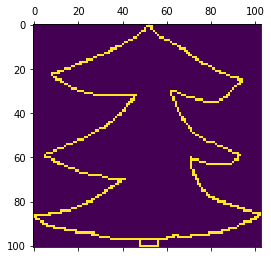

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# with open("Tree.png", "r") as file:
tree = 1-plt.imread('Tree.png', format='png')[:,:,0]
plt.matshow(tree)
locations = np.argwhere(tree==1)
np.std(locations, axis=0), np.mean(locations, axis=0), sum(locations)

In [13]:
with open("input14.txt") as f:
    data = f.read().splitlines()
config = []
for line in data:
    p, v = line.split()
    p, v = p.strip("p=").split(","), v.strip("v=").split(",")
    config.append((int(p[0]), int(p[1]), int(v[0]), int(v[1])))

In [34]:
init_place = []
width, height = ((101, 103) if len(config) > 50 else (11,7))
grid = np.zeros((width, height), dtype=int)

t=0
for robot in config:
    init_place.append((robot[0], robot[1]))
placemt = init_place.copy()

plt.rcParams["figure.figsize"] = (10,10)

1190 
[53.982 53.53 ] [28.15822573 29.62460295]
2426 
[58.12 53.53] [18.34997548 29.62460295]
5432 
[53.982 56.104] [28.15822573 17.86519477]
6668 
[58.12  56.104] [18.34997548 17.86519477]
6947 
[53.982 53.948] [28.15822573 29.35481725]
8183 
[58.12  53.948] [18.34997548 29.35481725]


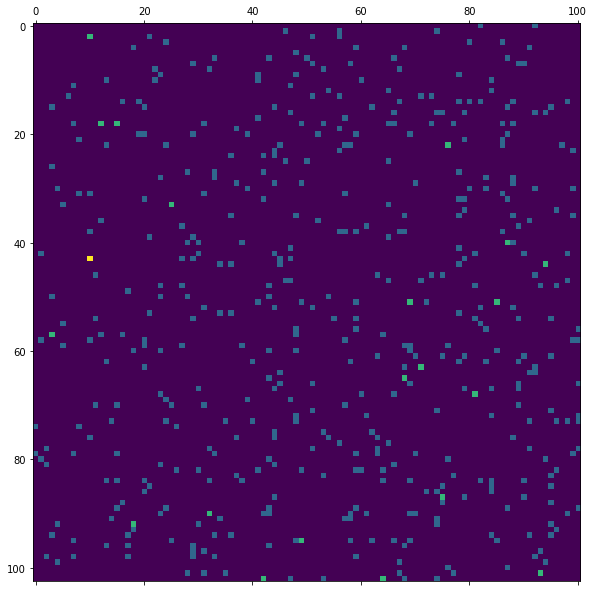

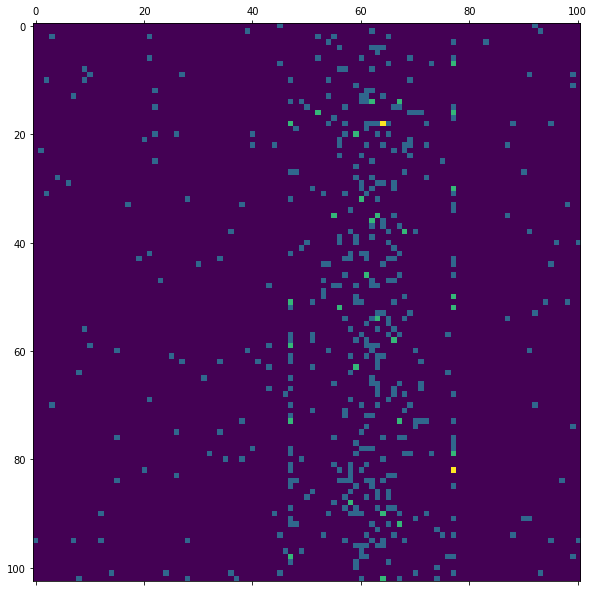

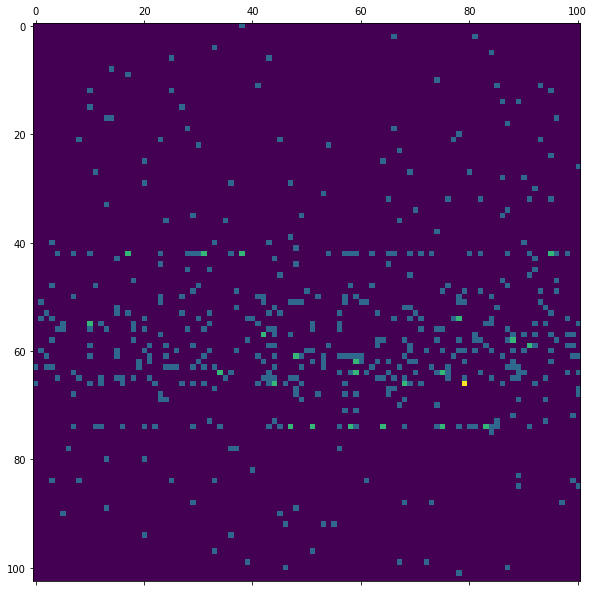

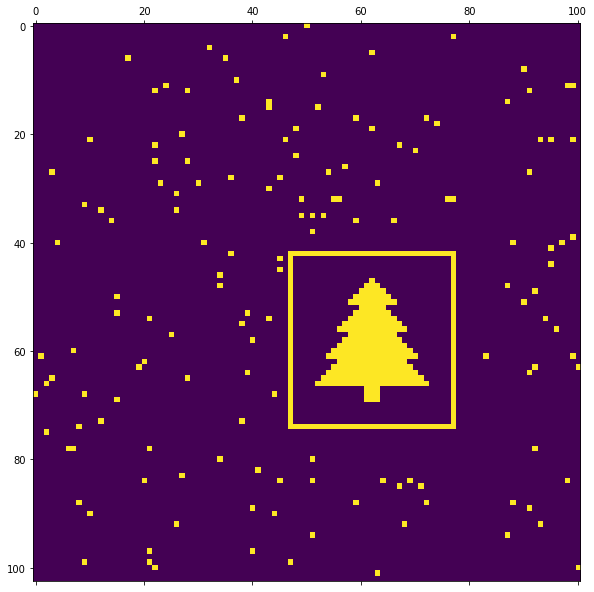

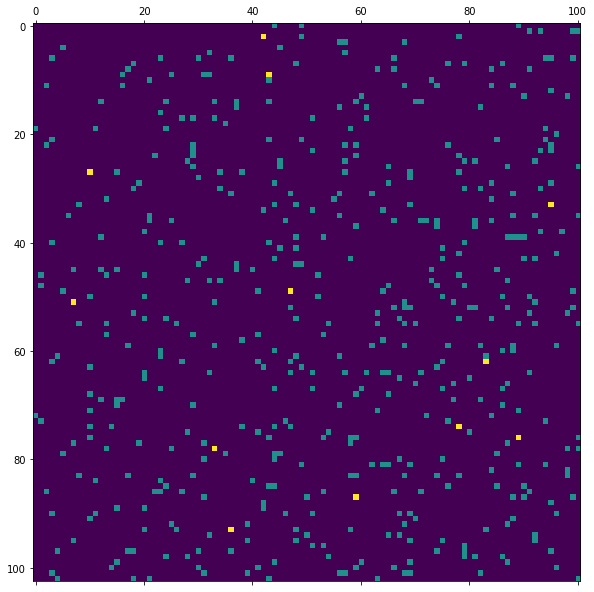

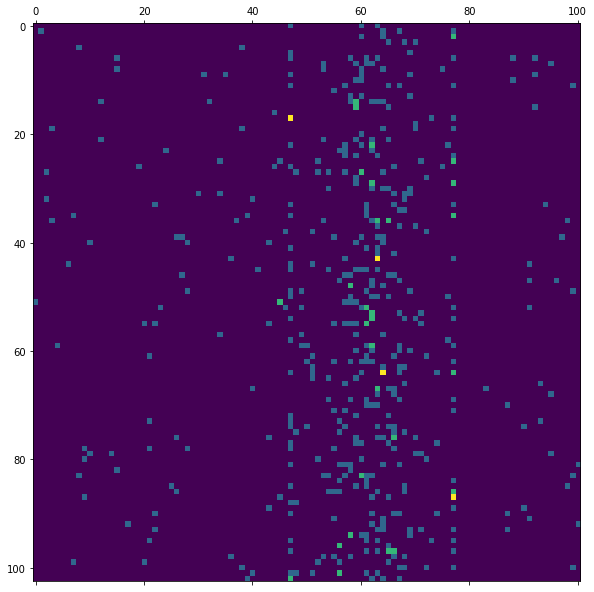

In [35]:
for _ in range(10000):
    t+=1
    grid = np.zeros((width, height), dtype=int)
    for i in range(len(placemt)):
        placemt[i] = ( (placemt[i][0] + config[i][2])%width, (placemt[i][1] + config[i][3])%height)
        grid[placemt[i]] += 1
    if (np.std(placemt, axis=0) < 25).all() or (np.abs(np.mean(placemt, axis=0) - 50)>3.5).all():
        print(t)
        plt.matshow(grid.T)
        print(np.mean(placemt, axis=0), np.std(placemt, axis=0))
    print(t,"\r", end="")